In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
from lib.DrugUtil import flatten, DrugUtil
import matplotlib.pyplot as plt

import plotly.express as px

from lib.FhirDataUtil import FhirDataUtil
from lib.CCSDataUtil import CCSDataUtil
from IPython.display import display, HTML


def printmd(string):
    display(string)

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

_output_dir = 'output/'

_rxnorm_file = "input_static/RxTerms202203/RxTerms202203.txt"
_rxnorm_ingredients_file = "input_static/RxTerms202203/RxTermsIngredients202203.txt"
_rxclass_file = "input_static/_rxclass_2022-04-10.csv"

_ccs_demographics_file = "input/ccs/ccs_demographics.csv"
_ccs_medications_file = "input/ccs/ccs_medications.csv"
_ccs_conditions_file = "input/ccs/ccs_conditions.csv"

_fhir_demographics_file = "input/fhir_20230423/fhir_demographics.csv"

_cr_file = 'input/chart_review/Chart_Review1.2c.xlsx'


_cache_dir = 'cache/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
fhirUtil = FhirDataUtil()
drugUtil = DrugUtil()
drugUtil.load(rxnorm_file=_rxnorm_file,
                        rxnorm_ingredients_file=_rxnorm_ingredients_file, 
                        rxclass_file=_rxclass_file)



Reading rxclass file...
Reading rxnorm file...


In [14]:
# Load chart review data
from pathlib import Path
xls = pd.ExcelFile(_cr_file, engine='openpyxl')
# file = Path(_cr_file)
# pd.read_excel(_cr_file, engine='openpyxl', sheet_name='Medications')

cr_meds_raw = pd.read_excel(xls, 'Medications')
cr_demo = pd.read_excel(xls, 'users_to_query')
cr_meds_raw['start_date_d'] = pd.to_datetime(cr_meds_raw['start_date'], errors='coerce')
cr_meds_raw['entered_on_d'] = pd.to_datetime(cr_meds_raw['entered_on'], errors='coerce')
cr_meds = cr_meds_raw.copy()

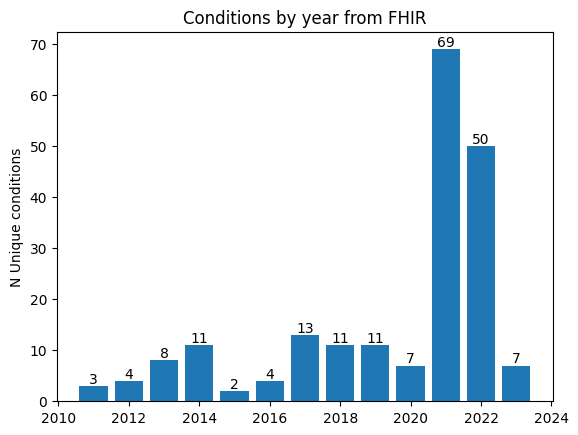

45    2011-09-21
48    2011-09-21
46    2011-09-21
43    2011-09-21
37    2011-09-21
47    2012-01-05
40    2012-01-05
199   2013-10-03
198   2013-10-03
185   2013-10-03
141   2014-02-09
118   2014-03-03
142   2014-03-13
131   2014-03-13
134   2014-03-13
69    2014-05-08
72    2014-05-09
68    2014-07-21
8     2015-01-09
6     2015-02-23
7     2015-02-23
161   2015-03-02
159   2015-03-08
59    2017-02-21
58    2017-03-07
107   2017-04-17
108   2017-04-17
112   2017-04-17
166   2017-08-25
168   2017-08-25
167   2017-08-25
12    2018-03-27
4     2018-03-27
22    2018-03-27
9     2018-04-02
15    2018-04-02
2     2018-04-02
17    2018-05-02
88    2018-06-05
67    2018-12-03
66    2018-12-03
0     2019-01-15
170   2019-01-16
176   2019-01-17
30    2019-03-12
29    2019-03-12
175   2019-07-15
162   2019-10-28
171   2019-11-20
169   2019-11-26
164   2020-03-02
172   2020-04-16
173   2020-04-16
163   2020-05-15
183   2020-10-01
193   2021-01-20
19    2021-04-02
74    2021-04-12
73    2021-04-

In [15]:
years = cr_meds['entered_on_d'].dt.year.value_counts().reset_index(name="Medications")
bar = plt.bar(years['index'], years['Medications'])
plt.bar_label(bar)
plt.title('Conditions by year from FHIR')
plt.ylabel('N Unique conditions')
plt.show()
cr_meds['start_date_d'].dropna().sort_values()

In [16]:
cr_meds = drugUtil.add_ingredient_columns(cr_meds, 'medication_name', new_code_column='cr_ing_code', new_name_column='cr_name_code').explode(['cr_ing_code', 'cr_name_code'])


100 / 214
200 / 214


In [18]:
cr_meds.to_csv(_cache_dir+'cr_meds_mapped.csv')